In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
#data sugmentation
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.15)

training_set = train_datagen.flow_from_directory('concrete_cracked_images/train',
                                                 target_size=(224,224),
                                                    color_mode="rgb",
                                                    subset="training",
                                                    class_mode="binary",
                                                    batch_size=32,
                                                    shuffle=True)

Found 24411 images belonging to 2 classes.


In [18]:
valid_generator=datagen.flow_from_directory(
                                                directory="concrete_cracked_images/train",
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                subset="validation",
                                                class_mode="binary",
                                                batch_size=32,
                                                shuffle=True)

Found 4307 images belonging to 2 classes.


In [15]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

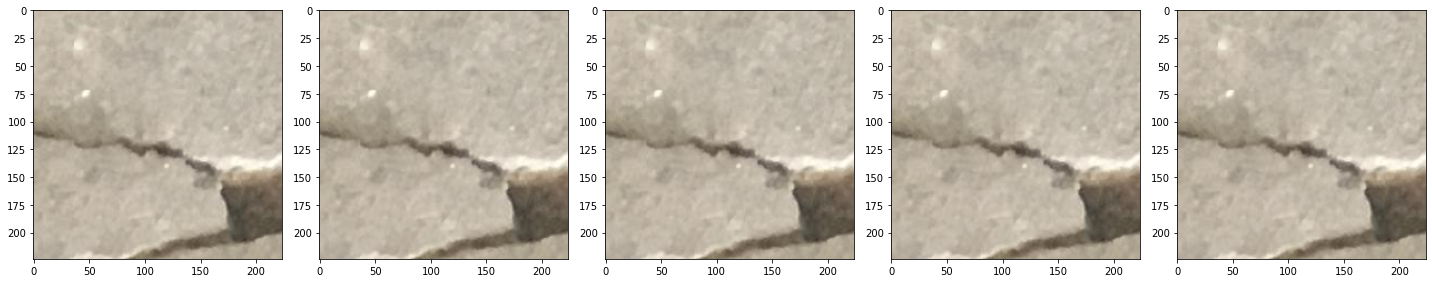

In [16]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [11]:
training_set.class_indices

{'Negative': 0, 'Positive': 1}

## Using CNN

In [24]:
from tensorflow.keras.layers import Conv2D

In [25]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - # Adding a first convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

###ann layer
tf.keras.layers.Dropout(0.5)
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
tf.keras.layers.Dropout(0.5)

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [26]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = valid_generator, epochs = 2)

Epoch 1/2
763/763 [==============================] - 1882s 2s/step - loss: 0.3887 - accuracy: 0.9040 - val_loss: 0.0732 - val_accuracy: 0.9779
Epoch 2/2
763/763 [==============================] - 1881s 2s/step - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.0918 - val_accuracy: 0.9675


In [29]:
import pandas as pd

In [30]:
test=pd.read_csv("concrete_cracked_images/Testing_set_concrete_crack.csv")
sub=pd.read_csv("concrete_cracked_images/sample_submission.csv")

In [31]:
test_generator=datagen.flow_from_dataframe(
                                            dataframe=test,
                                            directory="concrete_cracked_images/test",
                                            x_col="filename",
                                            y_col=None,
                                            batch_size=1,
                                            seed=42,
                                            shuffle=False,
                                            class_mode=None,
                                            target_size=(224, 224))

Found 11282 validated image filenames.


In [32]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [34]:
pred1=(cnn.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1))

11282/11282 [==============================] - 320s 28ms/step


In [35]:
pred1

array([[0.0255287 ],
       [0.0266439 ],
       [0.02964029],
       ...,
       [0.02888399],
       [0.99889916],
       [0.02763879]], dtype=float32)

In [36]:
pred=[]
for i in pred1:
    if (i<0.5): 
        pred.append(0)
    else: 
        pred.append(1)


In [38]:
sub["prediction"]=pred
sub["prediction"]=sub["prediction"].map({0:"Negative",1:"Positive"})

In [40]:
sub.to_csv("res50_256_dphi.csv",index=False)

In [45]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Image_110.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result 

array([[0.02326038]], dtype=float32)

In [46]:
if result[0]<=0.5:
    print("Not Cracked")
else:
    print("Cracked")

Not Cracked
